<a href="https://colab.research.google.com/github/Adityasaharan04/Data-Mining/blob/main/DM_LAB_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9777777777777777


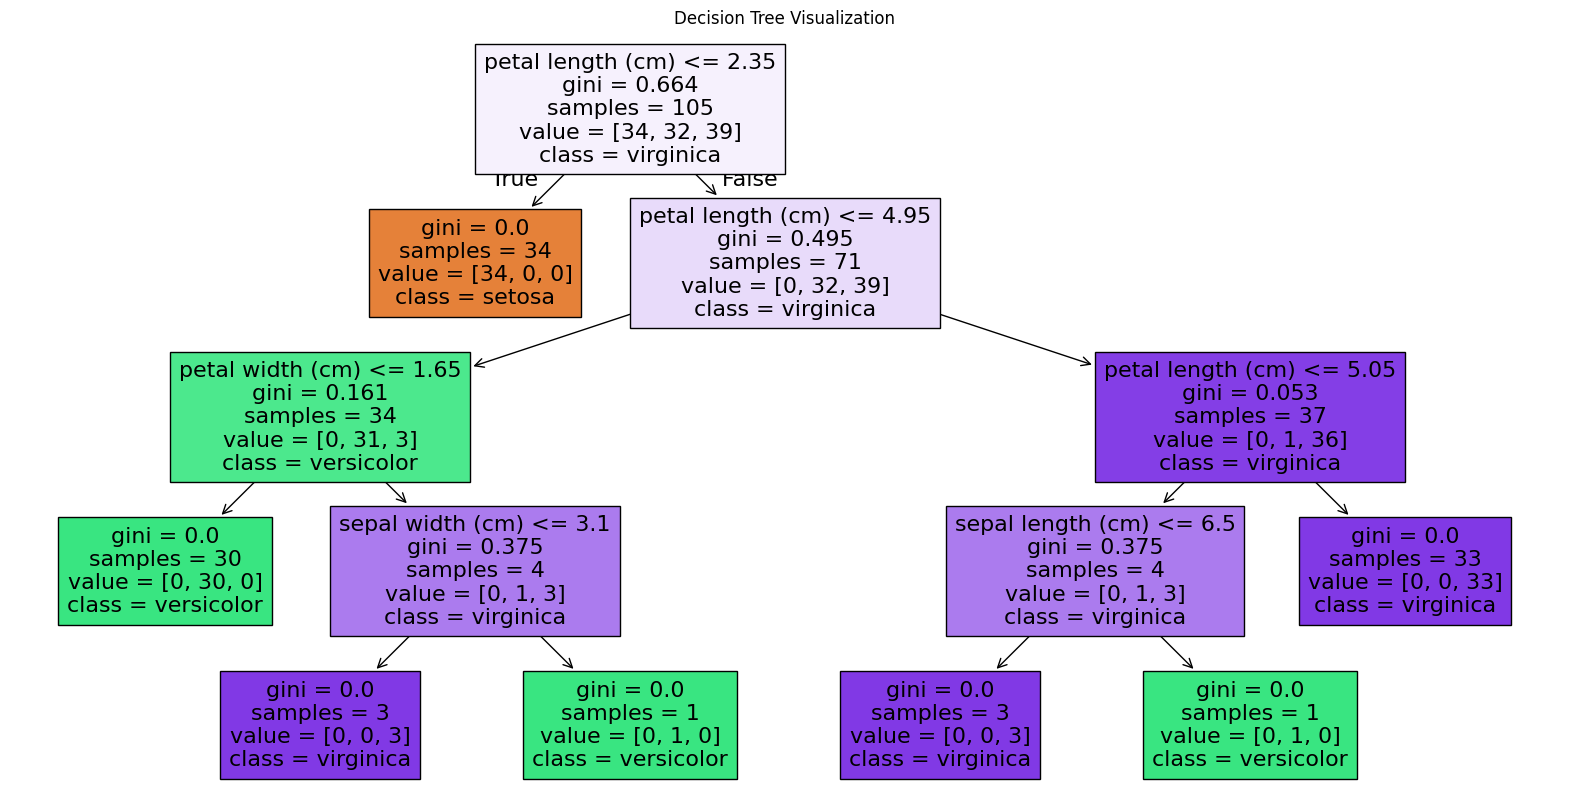

In [1]:
# Importing required libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the iris dataset
iris = load_iris()

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=0)

# Creating the Decision Tree classifier object
dtc = DecisionTreeClassifier()

# Fitting the classifier to the training data
dtc.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = dtc.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()


Classification Report:
               precision    recall  f1-score   support

        high       0.46      0.33      0.38        67
         low       0.62      0.78      0.69       213
      medium       0.52      0.42      0.46       200

    accuracy                           0.57       480
   macro avg       0.53      0.51      0.51       480
weighted avg       0.55      0.57      0.55       480



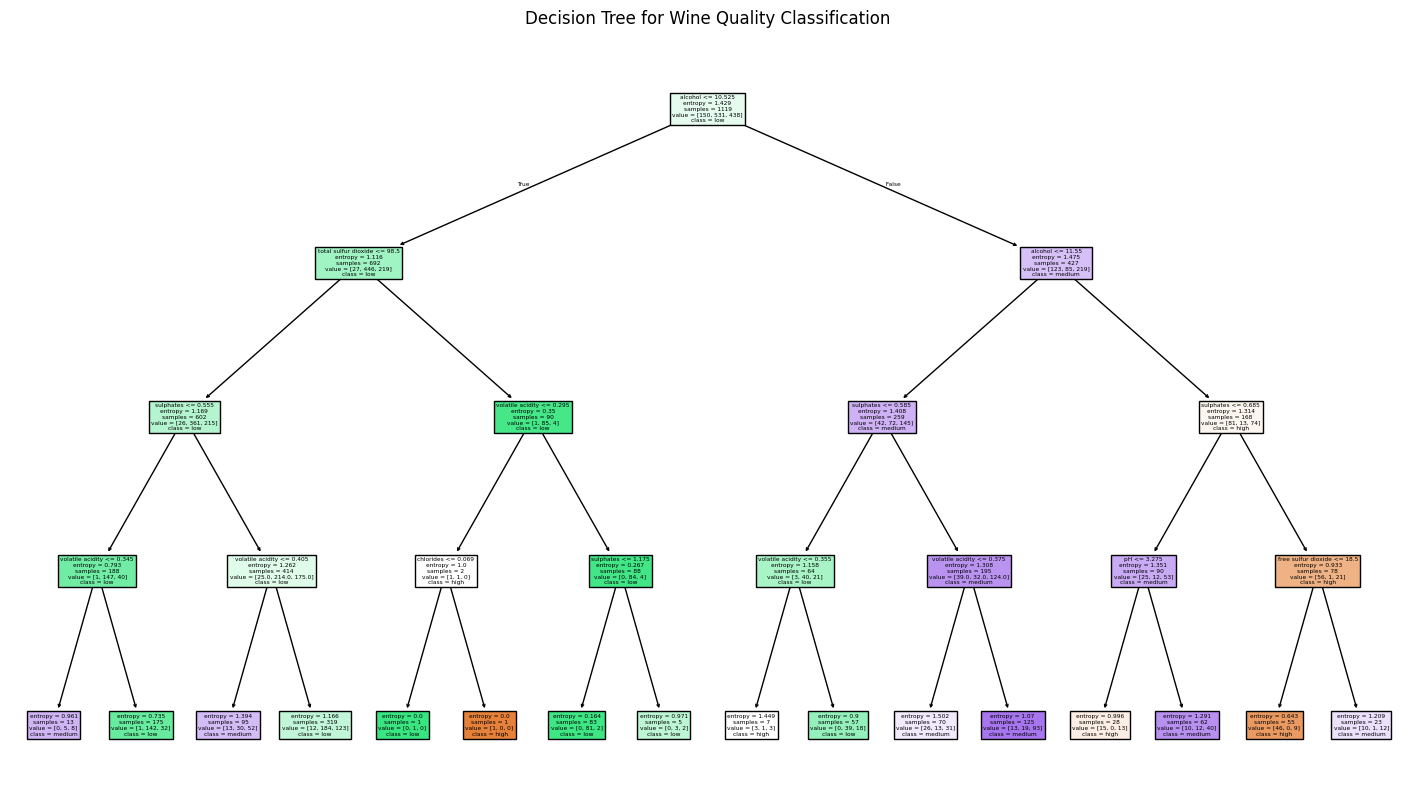

In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Convert quality to categorical (low: 3-5, medium: 6, high: 7-8)
bins = [2, 5.5, 6.5, 8]
labels = ['low', 'medium', 'high']
data['quality_cat'] = pd.cut(data['quality'], bins=bins, labels=labels)

# Split data
X = data.drop(['quality', 'quality_cat'], axis=1)
y = data['quality_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(18, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Decision Tree for Wine Quality Classification")
plt.show()


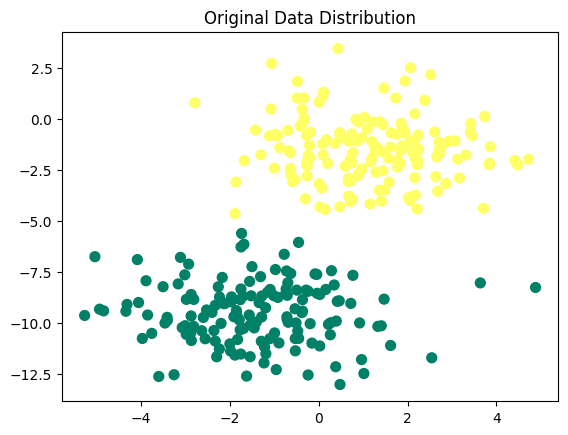

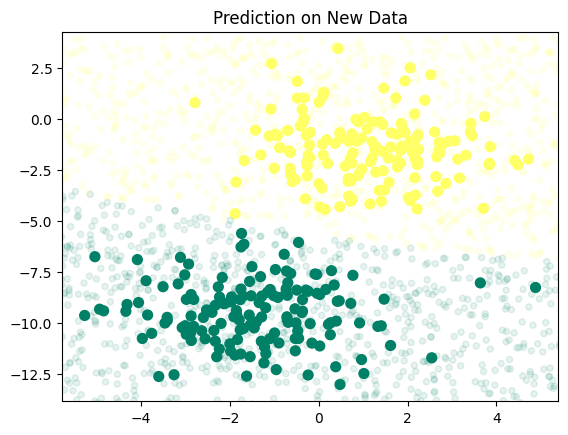

Posterior Probabilities (last 10 predictions):
[[0.998 0.002]
 [1.    0.   ]
 [0.987 0.013]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.986 0.014]]


In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

# Generate 2D Gaussian blobs for classification
X, y = make_blobs(n_samples=300, n_features=2, centers=2,
                  cluster_std=1.5, random_state=2)

# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer', s=50)
plt.title("Original Data Distribution")
plt.show()

# Create Gaussian Naive Bayes model and fit to data
model_GNB = GaussianNB()
model_GNB.fit(X, y)

# Generate new data points to test predictions
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model_GNB.predict(Xnew)

# Plot the predicted classes for new data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='summer', alpha=0.1)
plt.axis(lim)
plt.title("Prediction on New Data")
plt.show()

# Get posterior probabilities for the last 10 new points
yprob = model_GNB.predict_proba(Xnew)
print("Posterior Probabilities (last 10 predictions):")
print(yprob[-10:].round(3))


In [4]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Preprocess labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

